## Env

In [7]:
import control as ctl
import matplotlib as plt
from simple_pid import PID
import time

此处我们对3阶传递函数进行建模
$$
    G_p(s) = \frac{523500}{s^3 + 87.35 s^2 + 10470 s}
$$

In [10]:
ts=0.001;

sys = ctl.tf([523500], [1, 87.35, 10470])

dsys = ctl.c2d(sys, ts)

[num, den] = ctl.tfdata(dsys)

In [11]:
num

[[array([0.25407178, 0.24677862])]]

In [12]:
den

[[array([ 1.        , -1.90633931,  0.91635631])]]

PID控制器

In [4]:
Kp = 0.6
Ki = 0.03
Kd = 0.01

In [6]:
pid = PID(Kp, Ki, Kd, setpoint=1,  sample_time=0.001)

Main

In [ ]:
start_time = time.time()

last_time = start_time

temp = 0

setpoint, y, x = [1, 1, 1], [0, 0, 0], [0, 0, 0]

for i in range(3, 500):
    
    ## Setting dt
    current_time = time.time()
    dt = current_time - last_time
    
    ## output U(s) of the PID
    U = pid(temp)
    temp = -den[3] * y[i-1] - den[4] *y[y-2]
    # y(k)=-den(2)*y_1-den(3)*y_2-den(4)*y_3+num(1)*u(k)+num(2)*u_1+num(3)*u_2+num(4)*u_3;
    # error(k)=r(k)-y(k);

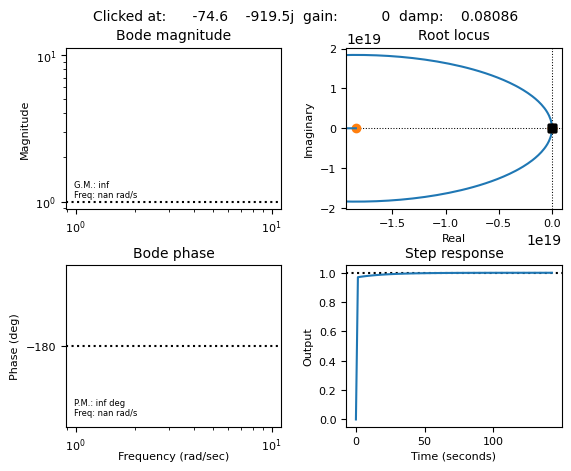

In [13]:
pid = ctl.rootlocus_pid_designer(sys,  Kp0=Kp, Ki0=Ki, Kd0=Kd)